# 1

A Simple Linear Regression (SLR) model is a statistical method that describes the relationship between two variables: a predictor (independent variable) $X$ and an outcome (dependent variable) $Y$. The model aims to fit a linear equation to the observed data and is represented as:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

where:
- $X$: The independent variable. Used to predict outcome
- $Y$: The dependent variable.
- $\beta_0$ (Intercept): Represents the starting point or baseline of the model when no predictor variable effect exists.
- $\beta_1$ (Slope): Represents the rate of change of $Y$ with respect to changes in $X$.
- $\epsilon$ (Error): This captures the noise or random deviation in $Y$ that is not explained by the linear relationship with $X$.

The predicted $Y$ values based on a given $X$ follow a normal distribution centered around the mean given by the linear equation $\beta_0 + \beta_1 X$ with variance determined by the error term.

This code below demonstrate how it works.

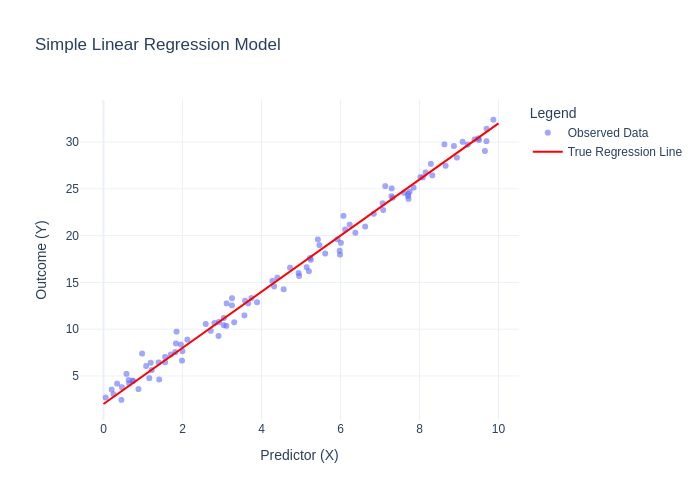

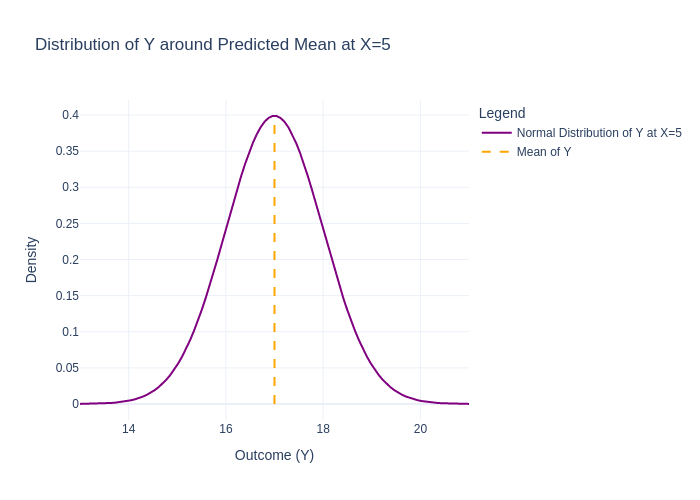

In [5]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm

# Define parameters
np.random.seed(42)
n_samples = 100  # number of samples
beta_0 = 2       # intercept
beta_1 = 3       # slope
sigma = 1        # standard deviation of error term (assumed normally distributed)

# Generate data
X = np.random.uniform(0, 10, size=n_samples)  # Random predictor values
epsilon = np.random.normal(0, sigma, size=n_samples)  # Normally distributed error term
Y = beta_0 + beta_1 * X + epsilon  # Linear model with noise

# Plot the data and regression line using Plotly
fig = go.Figure()

# Scatter plot of observed data
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Observed Data', marker=dict(size=6, opacity=0.6)))

# Regression line (without noise)
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Regression Line', line=dict(color='red')))

# Layout configuration
fig.update_layout(
    title='Simple Linear Regression Model',
    xaxis_title='Predictor (X)',
    yaxis_title='Outcome (Y)',
    legend_title='Legend',
    template='plotly_white'
)
fig.show(renderer="png")

# Theoretical normal distribution of Y at a specific X value
x_val = 5
predicted_mean_y = beta_0 + beta_1 * x_val
x_pdf = np.linspace(predicted_mean_y - 4 * sigma, predicted_mean_y + 4 * sigma, 100)
y_pdf = norm.pdf(x_pdf, loc=predicted_mean_y, scale=sigma)

# Plot the distribution using Plotly
fig_dist = go.Figure()

fig_dist.add_trace(go.Scatter(
    x=x_pdf,
    y=y_pdf,
    mode='lines',
    name=f'Normal Distribution of Y at X={x_val}',
    line=dict(color='purple')
))

fig_dist.add_trace(go.Scatter(
    x=[predicted_mean_y, predicted_mean_y],
    y=[0, max(y_pdf)],
    mode='lines',
    name='Mean of Y',
    line=dict(color='orange', dash='dash')
))

# Layout configuration for the distribution plot
fig_dist.update_layout(
    title='Distribution of Y around Predicted Mean at X=5',
    xaxis_title='Outcome (Y)',
    yaxis_title='Density',
    legend_title='Legend',
    template='plotly_white'
)
fig_dist.show(renderer="png")

# 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9289.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           6.65e-99
Time:                        02:48:25   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

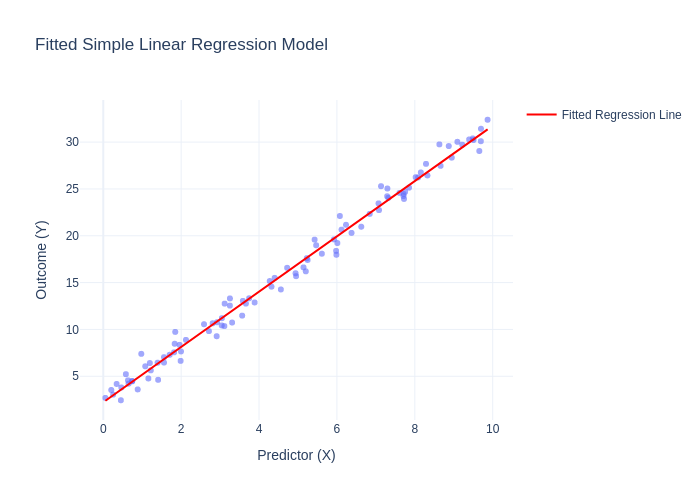

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Simulate data using theoretical Simple Linear Regression model
np.random.seed(42)
n_samples = 100
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 1   # Standard deviation of error term

# Generate predictor values and error terms
X = np.random.uniform(0, 10, size=n_samples)
epsilon = np.random.normal(0, sigma, size=n_samples)
Y = beta_0 + beta_1 * X + epsilon  # Generate response values

# Create DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Fit Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=df).fit()

# Display model summary
print(model.summary())

# Add fitted values to DataFrame
df['fitted_Y'] = model.fittedvalues

# Visualization using Plotly
fig = px.scatter(df, x='X', y='Y', opacity=0.6, title='Fitted Simple Linear Regression Model')
fig.add_scatter(x=df['X'], y=df['fitted_Y'], mode='lines', name='Fitted Regression Line', line=dict(color='red'))
fig.update_layout(
    xaxis_title='Predictor (X)',
    yaxis_title='Outcome (Y)',
    template='plotly_white'
)
fig.show(renderer="png")

# 3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9289.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           6.65e-99
Time:                        03:00:02   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

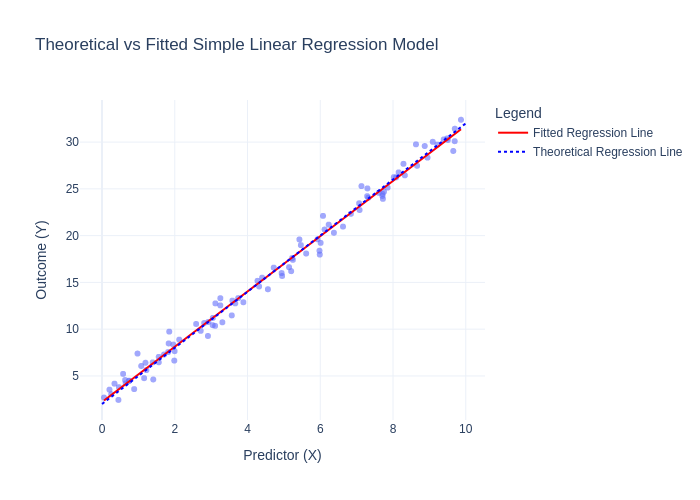

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Simulate data using theoretical Simple Linear Regression model
np.random.seed(42)
n_samples = 100
beta_0 = 2  # Intercept (Theoretical)
beta_1 = 3  # Slope (Theoretical)
sigma = 1   # Standard deviation of error term

# Generate predictor values and error terms
X = np.random.uniform(0, 10, size=n_samples)
epsilon = np.random.normal(0, sigma, size=n_samples)
Y = beta_0 + beta_1 * X + epsilon  # Generate response values

# Create DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Fit Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=df).fit()

# Display model summary
print(model.summary())

# Add fitted values to DataFrame
df['fitted_Y'] = model.fittedvalues

# Plot with Plotly - including both theoretical and fitted lines
fig = px.scatter(df, x='X', y='Y', opacity=0.6, title='Theoretical vs Fitted Simple Linear Regression Model')
fig.add_scatter(x=df['X'], y=df['fitted_Y'], mode='lines', name='Fitted Regression Line', line=dict(color='red'))

# Add the theoretical line to the plot
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Theoretical Regression Line', line=dict(color='blue', dash='dot')))

fig.update_layout(
    xaxis_title='Predictor (X)',
    yaxis_title='Outcome (Y)',
    legend_title='Legend',
    template='plotly_white'
)
fig.show(renderer="png")


## Key Difference (Nature of the Lines):

- Theoretical Line: This line represents the true relation between the predictor value and the outcome value that is based on already known parameters.
- Fitted Line: Reflects the real-world data as observed, in which it accounted for randomness and noises in the sample. Because of random sampling variation, the estimated coefficients may not exactly match the theoretical coefficients, leading to a line that might be slightly different from the theoretical one.

Link for q1-q3 summary: https://chatgpt.com/share/672d8006-3000-8012-a11c-9a6d19e34878

# 4

The `fitted_model.fittedvalues` are derived using the coefficients (parameters) displayed in `fitted_model.summary().tables[1]`, specifically found in `fitted_model.params` or `fitted_model.params.values`. The `fitted_model.params` or `fitted_model.params.values` contains the estimated coefficients (intercept and slopes) for each predictor variable used in your model. These values represent how much the dependent variable changes with a unit change in the corresponding predictor, holding all other predictors constant.

The relationship between the dependent variable ($y$) and the predictors ($X_1, X_2, \dots, X_n$) in a regression model is typically expressed as:

$$\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$$

where:

- $\hat{y}$ is the fitted value.
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients for each predictor.

The fitted values are obtained by plugging in the values of the predictor variables for each observation in the dataset into the model equation using the parameters from `fitted_model.params`. Essentially, for each observation $i$, the fitted value $\hat{y_i}$ is computed as:

$$\hat{y_i} = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_n X_{ni}$$

In `fitted_model.summary().tables[1]`, you typically see each coefficient's value, its standard error, t-statistic, and p-value. The params in `fitted_model.params` correspond to these coefficient values directly (the estimated $\beta$ values), which are used in the prediction formula to compute `fittedvalues`. Thus, the `fitted_model.fittedvalues` represent the predictions for the dependent variable using the model coefficients applied to the input data.

# 5

The Ordinary Least Squares (OLS) method chooses a line (or hyperplane in multiple dimensions) that minimizes the sum of the squared differences between the observed data points and the predicted values (i.e., residuals). In simple terms, it finds the line that best fits the data by minimizing the squared errors—the vertical distance between each observed data point and the line.

The reason it uses squares is to:

1. Eliminate negative and positive residuals cancelling each other out, ensuring all deviations contribute positively.
2. Give larger errors (further from the line) more weight, making the model more sensitive to outliers and helping to avoid small errors being overshadowed by large ones.

This approach makes the optimization problem solvable and ensures that the best-fitting line is found.

# 6

1. **First expression: Proportion of variation explained**  
   The first expression can be interpreted as the **coefficient of determination (R²)**, which measures the proportion of the total variation in the outcome variable $ Y $ that is explained by the model. Here's the breakdown:
   $
   1 - \frac{\sum (Y - \hat{Y})^2}{\sum (Y - \bar{Y})^2}
   $
   - The numerator $ \sum (Y - \hat{Y})^2 $ represents the **residual sum of squares (RSS)**, i.e., the unexplained variation by the model.
   - The denominator $ \sum (Y - \bar{Y})^2 $ represents the **total sum of squares (TSS)**, i.e., the total variation in $ Y $ around its mean.
   - This ratio $1 - \frac{RSS}{TSS}$ shows the proportion of variation explained by the model. If the model perfectly fits the data, the residuals are zero, and R² equals 1 (indicating all variation is explained by the model). If R² is close to 0, the model explains little of the variation.

2. **fitted_model.rsquared**  
   `fitted_model.rsquared` is the same as the expression above (R²), and it directly gives the proportion of the variation in the dependent variable $ Y $ that is explained by the independent variables in the model. A higher R² indicates a better fit, and it can be interpreted as a measure of how well the model captures the relationship between the predictors and the outcome.

3. **np.corrcoef(Y, fitted_model.fittedvalues)[0,1]\*\*2**  
   This expression computes the square of the **Pearson correlation coefficient** between the observed $ Y $ values and the fitted (predicted) values from the model. The correlation coefficient measures the strength and direction of the linear relationship between the two variables.  
   - Squaring the correlation coefficient gives the same value as $ R^2 $, since the correlation squared represents the proportion of variance in $ Y $ explained by the fitted values (i.e., the model).
   - This expression is another way to compute R² and reflects how closely the model’s predictions align with the actual observed values.

4. **np.corrcoef(Y, x)[0,1]\*\*2**  
   This expression computes the square of the **Pearson correlation coefficient** between the observed $ Y $ values and the predictor variable $ x $. It captures the proportion of the variance in $ Y $ that can be explained by the single predictor $ x $.  
   - This is **not** the model's R² but rather the proportion of variation in $ Y $ that is explained by $ x $ alone, before considering other variables or the regression model.

### Summary of Interpretations:
- The **R²** value (both from the formula and `fitted_model.rsquared`) shows how much of the variation in $ Y $ is explained by the model's predictors, thus acting as a measure of model accuracy.
- **np.corrcoef(Y, fitted_model.fittedvalues)[0,1]\*\*2** captures the same idea—how well the fitted values predict $ Y $.
- **np.corrcoef(Y, x)[0,1]\*\*2** measures how well the single predictor $ x $ can explain the variation in $ Y $, which is useful for understanding the strength of a linear relationship in simple linear regression.


Link for q4-q6 summary: https://chatgpt.com/share/672d8a83-580c-8012-b84c-552e3020668d

# 7

In the context of Simple Linear Regression, the following assumptions might not be fully compatible with the given data:

1. **Linearity Assumption:**
Simple linear regression assumes a linear relationship between the independent variable (fertilizer amount) and the dependent variable (crop yield). However, based on the provided data, the relationship might not strictly be linear, as evidenced by the scatter plot.
From the trendline in the scatter plot, the crop yield seems to increase rapidly at certain fertilizer amounts (particularly in higher ranges), which suggests potential non-linearity in the data.

2. **Homoscedasticity:**
Homoscedasticity refers to the assumption that the variance of residuals is constant across all levels of the independent variable. If the residuals are spread out more at higher values of the independent variable (fertilizer amount), this violates the assumption of homoscedasticity.
The histogram of residuals could indicate whether this assumption holds. If the residuals exhibit increasing or decreasing variance (e.g., a funnel shape), this suggests heteroscedasticity, which would violate the assumption.
You can further check for non-linearity by adding polynomial terms (like a quadratic term) or checking for heteroscedasticity through statistical tests or plotting residuals against the fitted values.

Link for q7 summary: https://chatgpt.com/share/672d8ab8-1474-8012-a2a3-8b55b863fe01

# 8

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:53:09   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis for "no linear association (on average)" between duration and waiting in the context of a Simple Linear Regression model can be specified as:

$$H_0 : \beta_1 = 0$$

where $\beta_1$ is the coefficient for the predictor variable waiting in the linear regression model. This represents the average change in the response variable duration for a one-unit change in waiting. The null hypothesis $H_0 : \beta_1 = 0$ suggests that there is no linear relationship between the waiting time and the duration of the geyser's eruption.

## Code Interpretation:

To assess evidence against the null hypothesis, you can look at the p-value associated with the coefficient $\beta_1$ (the slope) in the `fitted_model.summary()` output. If the p-value is small (typically less than 0.05), you can reject the null hypothesis and conclude that there is a significant linear association between waiting and duration.

## Example Interpretation:

After running the code, you'll get a summary of the regression results, which includes the p-value for $\beta_1$.

1. **If the p-value for `waiting` is low (e.g., below 0.05):**
Reject the null hypothesis: This suggests that there is strong evidence of a significant linear relationship between `waiting` time and `duration`. In other words, the `waiting` time appears to be a significant predictor of the eruption duration.

2. **If the p-value is high (e.g., above 0.05):**
Fail to reject the null hypothesis: This would imply that there is insufficient evidence to suggest a linear association between `waiting` and `duration`, so the belief would be that the relationship is either weak or non-existent on average.

## Belief Interpretation:

The null hypothesis is a starting point, and after analyzing the p-value, you adjust your beliefs:

- Rejecting the null hypothesis would suggest that you should believe a linear relationship exists between `waiting` and `duration` for this dataset due to the evidence suggesting that $H_0$ is probably not true.
- Failing to reject would lead you to maintain the belief that the `waiting` time might not be linearly related to `duration`.

# 9

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf

short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


In [10]:
import plotly.express as px
import statsmodels.formula.api as smf

short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


In [11]:
import plotly.express as px
import statsmodels.formula.api as smf

short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


1. Short Wait Limit = 62

- Coefficient for `waiting`: 0.0069 — This suggests a weak positive relationship between waiting time and eruption duration.
- P-value for `waiting` (slope): 0.238 — Since this is much higher than the typical threshold of 0.05, there is no strong evidence against the null hypothesis. This indicates that for waiting times under 62 minutes, the relationship between waiting time and duration is not statistically significant.
- Conclusion: No significant evidence of a relationship between waiting time and eruption duration for short wait times under 62 minutes.

2. Short Wait Limit = 64

- Coefficient for `waiting`: 0.0114 — This suggests a positive relationship between waiting time and eruption duration.
- P-value for `waiting` (slope): 0.036 — Since this is below 0.05, there is a moderate evidence against the null hypothesis, suggesting that waiting time has a statistically significant impact on eruption duration for waiting times under 64 minutes.
- Conclusion: At the 64-minute threshold, there is a moderate evidence that there is a relationship between waiting time and eruption duration.

3. Short Wait Limit = 66

- Coefficient for `waiting`: 0.0221 — This suggests a stronger positive relationship between waiting time and eruption duration.
- P-value for `waiting` (slope): 0.000 — This is much smaller than 0.05, providing very strong evidence against the null hypothesis. The relationship between waiting time and eruption duration is highly statistically significant for waiting times under 66 minutes.
- Conclusion: For short wait times under 66 minutes, there is a very strong evidence of a significant positive relationship between waiting time and eruption duration.

## Conclusion:

As the short wait limit increases, the relationship between waiting time and eruption duration becomes statistically significant. For wait times shorter than 62 minutes, there is no evidence of a significant relationship. However, for 64 and 66 minutes, we see statistically significant positive relationships, with the strength of the relationship increasing as the limit increases.

# 10

## Generate Fitted Models for Bootstrap Samples and Collect the Sampling Distribution of the Slope

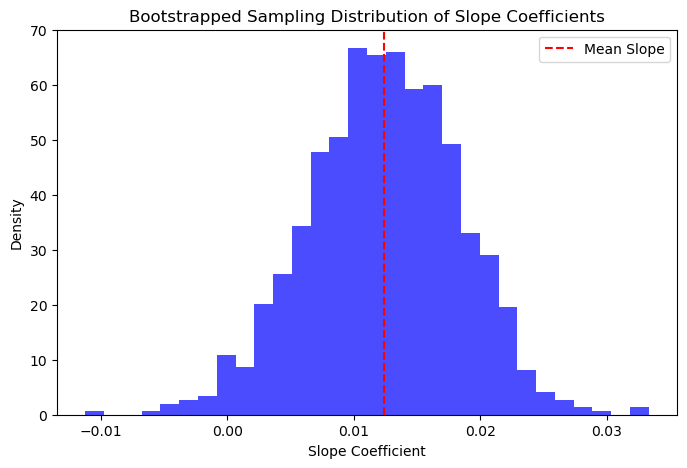

In [12]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

# Load the Old Faithful dataset (assuming you have it loaded already as 'old_faithful')
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
n_samples = len(old_faithful[long_wait])

# Generate bootstrap samples
n_bootstraps = 1000
bootstrap_slopes = []

for _ in range(n_bootstraps):
    # Sample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(n=n_samples, replace=True)
    # Fit the model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_slopes, bins=30, density=True, alpha=0.7, color='blue')
plt.axvline(np.mean(bootstrap_slopes), color='red', linestyle='--', label='Mean Slope')
plt.xlabel('Slope Coefficient')
plt.ylabel('Density')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.legend()
plt.show()


## Simulate Samples Under the Null Hypothesis

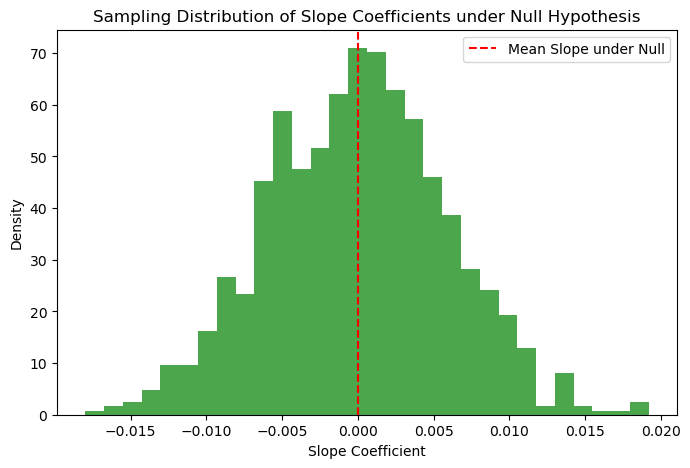

In [13]:
# Parameters for null hypothesis simulation
beta_0 = 1.65  # Intercept
beta_1 = 0     # No association (slope = 0)
stddev = 0.37  # Standard deviation

# Generate samples under the null hypothesis
simulated_slopes = []
for _ in range(n_bootstraps):
    # Generate simulated Y values based on the null hypothesis
    simulated_Y = beta_0 + beta_1 * old_faithful[long_wait]['waiting'] + np.random.normal(0, stddev, size=n_samples)
    # Create a simulated dataset
    simulated_data = pd.DataFrame({'waiting': old_faithful[long_wait]['waiting'], 'duration': simulated_Y})
    # Fit the model to the simulated data
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(simulated_model.params['waiting'])

# Visualize the sampling distribution under the null hypothesis
plt.figure(figsize=(8, 5))
plt.hist(simulated_slopes, bins=30, density=True, alpha=0.7, color='green')
plt.axvline(np.mean(simulated_slopes), color='red', linestyle='--', label='Mean Slope under Null')
plt.xlabel('Slope Coefficient')
plt.ylabel('Density')
plt.title('Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.legend()
plt.show()


## Report if 0 is within the 95% Confidence Interval of the Bootstrapped Distribution and Compare Simulated p-value with the Model Summary

In [14]:
# Calculate the 95% confidence interval for the bootstrapped slopes
lower_bound = np.percentile(bootstrap_slopes, 2.5)
upper_bound = np.percentile(bootstrap_slopes, 97.5)
print(f"95% Bootstrapped Confidence Interval for the slope: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Check if 0 is within the interval
contains_zero = lower_bound <= 0 <= upper_bound
print(f"Does the 95% bootstrapped confidence interval contain 0? {'Yes' if contains_zero else 'No'}")

# Fit the original model for long wait times
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print(original_model.summary().tables[1])  # This will print the p-value for comparison

# Calculate the simulated p-value (fraction of simulated slopes as extreme or more extreme than observed slope)
observed_slope = original_model.params['waiting']
simulated_p_value = np.mean(np.abs(simulated_slopes) >= np.abs(observed_slope))
print(f"Simulated p-value: {simulated_p_value}")


95% Bootstrapped Confidence Interval for the slope: [0.0002, 0.0232]
Does the 95% bootstrapped confidence interval contain 0? No
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024
Simulated p-value: 0.039


We can see that simulated p-value **almost** matches the p-value in the table, with a margin of 0.001 or less.

# 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


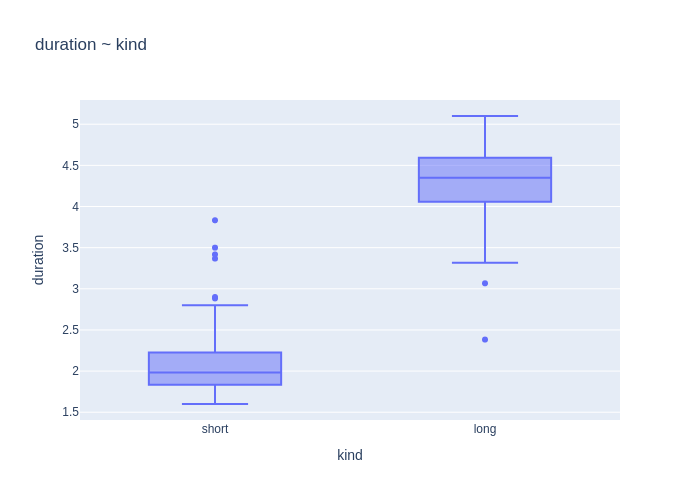

In [19]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

## Key Differences from Previous Models

1. Indicator vs. Continuous Variable:
    - In previous models (`smf.ols('duration ~ waiting', data=...)`), `waiting` was treated as a continuous variable, modeling a linear relationship between waiting time and duration.
    - In this model, we use a categorical (binary) indicator variable that segments the data into two groups (`short` and `long`). This allows us to focus on the difference in mean duration between the two groups.

2. Interpretation of Coefficients:
    - For the previous models (`smf.ols('duration ~ waiting', data=...)`), the slope coefficient represents the expected change in duration for a one-unit increase in waiting time.
    - In the new model, $\beta_{\text{contrast}}$ quantifies the difference in mean duration between the `long` and `short` groups, rather than measuring how duration changes with each unit increase in waiting.

3. Focus of the Null Hypothesis:
    - In the previous models, the null hypothesis typically assessed whether there was a linear relationship between `waiting` and `duration` (i.e., testing if the slope coefficient was 0).
    - In the new model, the null hypothesis tests whether there is a difference in average duration between `long` and `short` groups (i.e., testing if $\beta_{\text{contrast}} = 0$)

## Result on The Evidence

For the new indicator variable-based model using kind as a categorical variable, the results provide clear statistical evidence regarding the difference between the short and long wait time groups in terms of eruption duration.

### Interpretation of the Model Results:

1. Model Coefficients:
    - Intercept (Baseline Group: "short" wait times): The estimated mean duration for the `short` wait time group is 2.0943, with a standard error of 0.041.
    - Coefficient for `C(kind, Treatment(reference="short"))[T.long]`: This value represents the difference in mean duration between the `long` and `short` groups. The estimated coefficient is 2.2036, meaning that the mean duration for `long` wait times is 2.2036 units longer than for `short` wait times. The associated standard error is 0.052.

2. Statistical Significance:
    - P-value: The p-value for the coefficient of `C(kind, Treatment(reference="short"))[T.long]` is 0.000, which is highly significant (p < 0.001). This provides a very strong evidence against the null hypothesis of "no difference between groups on average."
    - Confidence Interval: The 95% confidence interval for this coefficient is [2.101, 2.306], meaning we are 95% confident that this range contains the true difference in mean duration between the `long` and `short` groups.


### Evidence Against the Null Hypothesis:

- Null Hypothesis: The null hypothesis states that there is no difference in mean duration between the `short` and `long` groups (i.e., the coefficient for `C(kind, Treatment(reference="short"))[T.long]` is 0).
- Result: The p-value of 0.000 indicates that we can reject the null hypothesis with very strong confidence and evidence. This suggests that there is a significant difference in mean duration between short and long wait times.

### Conclusion:

The analysis shows that the mean duration of eruptions is significantly higher for `long` wait times compared to `short` wait times. The substantial t-statistic (42.464) and highly significant p-value confirm that the difference is both statistically and practically meaningful. This indicates that categorizing wait times into `short` and `long` reveals a clear and significant distinction in eruption duration.

Link for q8-q11 summary: https://chatgpt.com/share/672d9e36-5fec-8012-8f72-d77a85d1887c

# 12

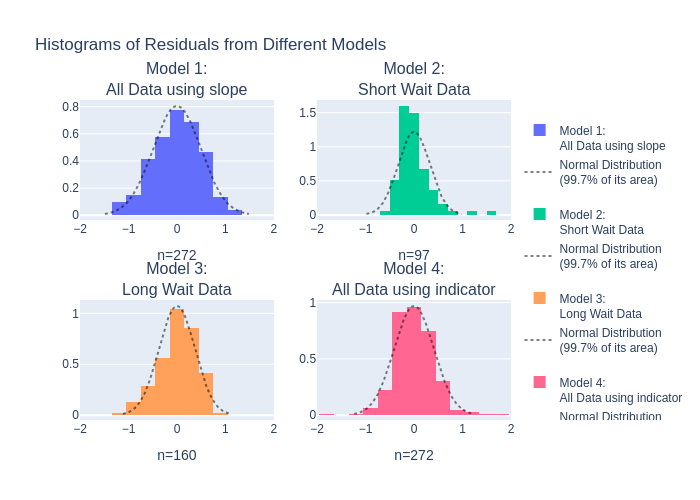

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

In the histograms, we can evaluate the plausibility of the assumption that the distribution of error terms follows a normal distribution by observing the shape and fit of the histogram relative to the overlaid normal distribution curve.

- Model 1 (Top Left): This histogram appears to show a roughly symmetric distribution centered around zero, and it fits relatively well to the dashed line representing a normal distribution. Thus, it suggests that the error terms could plausibly be normally distributed for this model.

- Model 2 (Top Right): This histogram is skewed with a concentration of residuals on one side, indicating that the distribution is not symmetric around zero and deviates significantly from a normal distribution. Therefore, the assumption of normal error terms is not supported for this model.

- Model 3 (Bottom Left): While this histogram shows less skew than Model 2, it does appear slightly asymmetrical and does not match the normal distribution curve as closely as Model 1. There may also be some outliers. This makes it less supportive of normally distributed error terms compared to Model 1.

- Model 4 (Bottom Right): This histogram also appears to have a closer fit to a normal distribution compared to Models 2 and 3, but it is somewhat less symmetric and exhibits a few deviations from the expected distribution shape. The errors are not as well-distributed as in Model 1, but it is a better fit than the other two.

In conclusion, model 1 shows the best fit for a normal distribution of error terms, indicating that it most plausibly supports the assumption. The other models either show skewness or deviations in shape that do not conform well to a normal distribution.

# 13

## Permutation Test

Observed Mean Difference: 2.2036
P-value: 0.0000


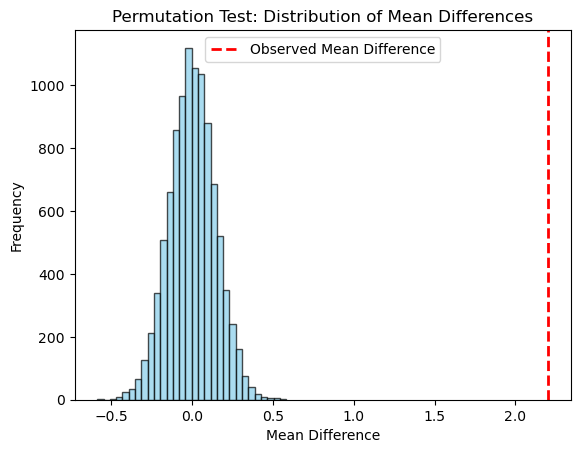

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Separate the data into short and long wait groups
short_wait = old_faithful[old_faithful['kind'] == 'short']['duration']
long_wait = old_faithful[old_faithful['kind'] == 'long']['duration']

# Calculate the observed difference in means
obs_mean_diff = np.mean(long_wait) - np.mean(short_wait)

# Function to perform permutation test
def permutation_test(short_wait, long_wait, n_permutations=10000):
    combined = np.concatenate([short_wait, long_wait])
    n_short = len(short_wait)
    mean_diffs = np.zeros(n_permutations)
    
    for i in range(n_permutations):
        # Shuffle the combined array and split into new "short" and "long" groups
        np.random.shuffle(combined)
        new_short = combined[:n_short]
        new_long = combined[n_short:]
        mean_diffs[i] = np.mean(new_long) - np.mean(new_short)
    
    # Calculate the p-value
    p_value = np.mean(np.abs(mean_diffs) >= np.abs(obs_mean_diff))
    return mean_diffs, p_value

# Perform the permutation test
mean_diffs, p_value = permutation_test(short_wait, long_wait)

# Print the result
print(f"Observed Mean Difference: {obs_mean_diff:.4f}")
print(f"P-value: {p_value:.4f}")

# Plotting the permutation distribution
import matplotlib.pyplot as plt
plt.hist(mean_diffs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(obs_mean_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Difference')
plt.title('Permutation Test: Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Confidence Interval Through Bootstrapping

95% Bootstrap Confidence Interval for Mean Difference: (2.1012322790697686, 2.302112168604652)


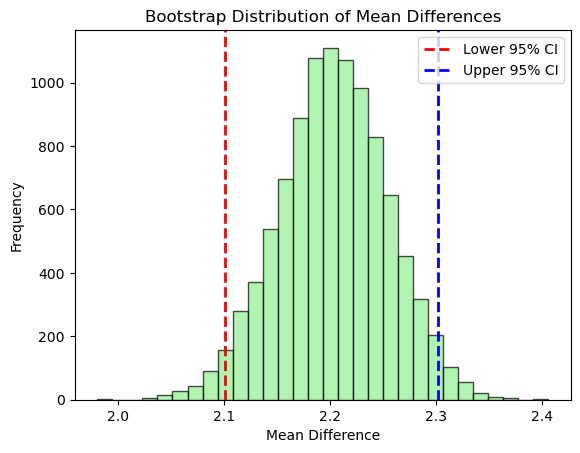

In [23]:
# Function to perform bootstrap sampling for mean difference
def bootstrap_confidence_interval(short_wait, long_wait, n_bootstraps=10000):
    bootstrapped_mean_diffs = np.zeros(n_bootstraps)
    
    for i in range(n_bootstraps):
        # Resample with replacement within each group
        boot_short = np.random.choice(short_wait, size=len(short_wait), replace=True)
        boot_long = np.random.choice(long_wait, size=len(long_wait), replace=True)
        
        # Calculate the difference in means for the resamples
        bootstrapped_mean_diffs[i] = np.mean(boot_long) - np.mean(boot_short)
    
    # Calculate the 95% confidence interval
    ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])
    return bootstrapped_mean_diffs, (ci_lower, ci_upper)

# Perform the bootstrap procedure
bootstrapped_mean_diffs, confidence_interval = bootstrap_confidence_interval(short_wait, long_wait)

# Print the result
print(f"95% Bootstrap Confidence Interval for Mean Difference: {confidence_interval}")

# Plotting the bootstrap distribution
import matplotlib.pyplot as plt
plt.hist(bootstrapped_mean_diffs, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='Lower 95% CI')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label='Upper 95% CI')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Explanation of Sampling Approaches for the Two Simulations

- Permutation Test Simulation:
    - The permutation test assesses the null hypothesis that there is no difference in the mean durations of the "short" and "long" groups by randomly reassigning labels (i.e., "short" or "long") to the observed data points.
    - For each iteration, a new "short" and "long" group is created by shuffling the labels, and the mean difference between the two groups is calculated.
    - This process is repeated many times (e.g., 10,000 times) to build a distribution of mean differences under the assumption that the null hypothesis is true. The p-value is calculated as the proportion of permutations where the mean difference is at least as extreme as the observed mean difference.
- Bootstrap Confidence Interval Simulation:
    - The bootstrap approach creates resamples (with replacement) within each original group (i.e., "short" and "long") and calculates the mean for each resample.
    - For each iteration, a new difference in means between the two resampled groups is computed. This process is repeated many times (e.g., 10,000 times) to build a distribution of bootstrapped mean differences.
    - The 95% confidence interval is determined by taking the 2.5th and 97.5th percentiles of the bootstrapped distribution of mean differences, providing an estimate of the plausible range of the true mean difference between the groups.

## Comparison and Contrast with Indicator Variable-Based Model Approach

Similarity:

- All three methods (permutation test, bootstrap, and indicator variable-based modeling) are used to assess differences between the "short" and "long" wait groups.
- The goal of each approach is to understand the difference in means or effects between the two groups, providing a way to test hypotheses or quantify differences.

Differences:

- Statistical Assumptions:
    - Permutation tests and bootstrapping are non-parametric and make fewer assumptions about the underlying distribution of the data. They derive results based on empirical resampling, making them robust to non-normality and other violations of classical assumptions.
    - The indicator variable-based model is a parametric approach that relies on a linear regression framework. This method assumes that the errors are normally distributed, the relationship is linear, and variance is homogenous across levels of the predictor.

- How the Difference is Modeled:
    - Permutation tests and bootstrap confidence intervals assess the difference directly through resampling techniques, without fitting a model or estimating parameters other than the mean difference.
    - The indicator variable-based model approach fits a regression model with an indicator (categorical) variable that captures the effect of being in either the "short" or "long" group. This model can be extended to include other covariates (e.g., waiting), allowing for additional flexibility in modeling relationships within the data.

- Focus and Interpretation:
    - Permutation tests focus on whether the observed difference in means is likely to have occurred by chance under the null hypothesis, resulting in a p-value as a measure of significance.
    - Bootstrap methods provide a range of plausible values (confidence interval) for the true mean difference, offering a sense of uncertainty around the estimated effect.
    - The indicator variable model provides a coefficient estimate that quantifies the effect of the "short" or "long" group on the outcome (e.g., duration), adjusted for other covariates, if applicable. The significance of this effect can be assessed through p-values and confidence intervals derived from the model fit.

In summary, the permutation and bootstrap methods provide resampling-based insights directly from the data with minimal assumptions, while the indicator variable-based approach uses regression modeling, offering greater flexibility in capturing complex relationships at the expense of relying on model assumptions.